In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# For reading building.yaml as a Python dict
import yaml # If you don't have this package use 'pip install pyyaml' into commandline or terminal


# Matplotlib Config
%matplotlib inline
plt.style.use('fivethirtyeight')

In [4]:
# Turn 'building.yaml' file into a python dictionary using PyYAML 

with open('building.yaml') as f:
    building_data = f.read()
    building_data = yaml.load(building_data)
    f.close()

In [5]:
## See what keys exist in the dictionary
print(building_data.keys())

dict_keys(['building1'])


In [6]:
## There is only one key, which further has two keys - Type has one value 'obstacle' so we're interested in 'geometries'
print(building_data['building1'].keys())
print(building_data['building1']['type'])


## 'geometries' is a list with 6461 objects
print(type(building_data['building1']['geometries']))
print(type(building_data['building1']['geometries'][0]))
print(len(building_data['building1']['geometries']))
print(len(building_data['building1']['geometries'][0]))

dict_keys(['type', 'geometries'])
obstacle
<class 'list'>
<class 'dict'>
6461
3


In [7]:
#this is how one element of geometries looks like

building_data['building1']['geometries'][0]

#its a list of dictionaries  with 3 keys - collision_geometry, config and name
#collision

{'collision_geometry': {'dims': [4.150000000000006, 0.15, 2.99],
  'material': 'grey',
  'type': 'box'},
 'config': {'orientation': [6.123233995736766e-17, 1.0, 0.0, 0.0],
  'position': [114.325, -45.14, 7.5]},
 'name': 'NoName10'}

In [8]:
## Print first ten elements of the list
print(building_data['building1']['geometries'][:10])

[{'name': 'NoName10', 'config': {'orientation': [6.123233995736766e-17, 1.0, 0.0, 0.0], 'position': [114.325, -45.14, 7.5]}, 'collision_geometry': {'material': 'grey', 'type': 'box', 'dims': [4.150000000000006, 0.15, 2.99]}}, {'name': 'NoName12', 'config': {'orientation': [0.7071067811865476, 0.7071067811865475, 0.0, 0.0], 'position': [116.4, -46.945, 7.5]}, 'collision_geometry': {'material': 'grey', 'type': 'box', 'dims': [3.6099999999999994, 0.15, 2.99]}}, {'name': 'NoName19', 'config': {'orientation': [1.0, 0.0, 0.0, 0.0], 'position': [92.445, -62.4, 7.5]}, 'collision_geometry': {'material': 'grey', 'type': 'box', 'dims': [47.69000000000001, 0.15, 2.99]}}, {'name': 'NoName26', 'config': {'orientation': [6.123233995736766e-17, 1.0, 0.0, 0.0], 'position': [33.085, -63.02, 7.5]}, 'collision_geometry': {'material': 'grey', 'type': 'box', 'dims': [8.450000000000003, 0.15, 2.99]}}, {'name': 'NoName28', 'config': {'orientation': [0.7071067811865476, -0.7071067811865475, 0.0, 0.0], 'positio

In [9]:
## 'type' seems interesting in the 'geometries' dictionary
## Iterate over the elements, add it to a list and use 'set' to get the unique 'types'

type_list = []
for i in building_data['building1']['geometries']:
    type_list.append(i['collision_geometry']['type'])
    
## Set gives you the unique elements in a list
print(set(type_list))

{'polygon', 'box'}


In [10]:
## Look at items that are of type 'box'
box_type = []
for i in building_data['building1']['geometries']:
    if i['collision_geometry']['type'] == 'box':
        box_type.append(i['name'])

len(box_type)
#print(box_type)
## Most of them are NoName objects so let's look at type == 'polygons'

5030

In [11]:
## Look at items that are of type 'polygon'
polygon_type = []
check = []
for i in building_data['building1']['geometries']:
    if i['collision_geometry']['type'] == 'polygon':
        polygon_type.append(i['name'])
        check.append(i['collision_geometry']['triangles'][2])

len(polygon_type)
set(check) #set of Z values
#print(polygon_type)
## These look far more interesting from an entry/exit perspective. A lot more descriptive
## compared to type 'box'.

{0.0,
 1.5219512195121945,
 3.0,
 3.9056603773584877,
 3.9898477157360412,
 4.320000000000002,
 6.0,
 6.831325301204819,
 7.431372549019607,
 8.024999999999999,
 8.149999999999999,
 9.0,
 9.59016393442623,
 10.853932584269664,
 10.954983922829582,
 11.608695652173914,
 12.0,
 15.0,
 18.0,
 21.0,
 24.0}

In [12]:
## Let's try another approach where we print out all 'names' that are not 'NoName' to see what different type of
## objects exist.

for i in range(0,len(building_data['building1']['geometries'])):
    if 'NoName' not in str(building_data['building1']['geometries'][i]['name']):
        print(building_data['building1']['geometries'][i]['name'])
        
## Pretty much the same result as the polygon/box differentiation.

entry__exit_4_58
radio_shack_69
casa_java_96
vacant_2_132
vacant_1_139
Hudson_News_Stand_199
men_s_room_256
info_booth_1_306
cake_boss_454
entry_exit_7_455
entry_exit_stairs_544
blue_and_red_stairwell_550
entry_exit_591
hudson_news_2_623
SF_office_1_668
Escalator_Second_7_2_679
Escalator_Second_7_3_712
Munchy_s_724
stair_D_729
_731
_751
vacant_1_805
hudson_news_2_807
sweet_factory_862
mrs__field_s_cookies_866
loading_dock_868
trash_871
exit_entry_1_1002
exit_entry_ramp_1004
Lobby_4_1008
Escalator_Second_5_1_1195
escalator_26_1281
1329
Aunty_Anne_s_1331
storage_room_1338
lottery_1347
passageway_3_1384
_1394
passageway_2_1406
passageway_1_1408
telephones_1423
escalator_and_entry_exit_1442
Bolton_s_1445
_1460
strawberry_1470
wl_stairwell_1471
elec_room_3_1502
Escalator_Second_6_2_1512
Escalator_Second_6_4_1520
Escalator_Second_6_3_1528
Escalator_Second_8_2_1539
cafe_metro_1545
ticket_1555
shortline_tickets_1564
Women_s_room_1594
Men_s_room_2_1621
hudson_news_and_storage_1639
Mcann_s_cafe_

In [13]:
## For an initial run, let's look at objects that have the words 'exit' 'entry' 'entrance' in their name
## and add their info to a list.
## There could be more than these entrances/exits with other names?? - this is just for a starting point

In [14]:
exit_entry_list = []

for i in range(0,len(building_data['building1']['geometries'])):
    for keyword in ['exit','entry','entrance']:
        if (keyword in str(building_data['building1']['geometries'][i]['name']).lower()):
            exit_entry_list.append(building_data['building1']['geometries'][i])

print(len(exit_entry_list))
print(len(exit_entry_list[0]))

26
5


In [15]:
exit_entry_list[:3]

[{'collision_geometry': {'material': 'off_white',
   'triangles': [100.6,
    -17.01,
    6.0,
    100.6,
    -11.75,
    6.0,
    92.88,
    -11.75,
    6.0,
    100.6,
    -17.01,
    6.0,
    92.88,
    -11.75,
    6.0,
    92.88,
    -17.01,
    6.0],
   'type': 'polygon'},
  'config': {'orientation': [0, 0, 0, 1], 'position': [0, 0, 0]},
  'isElevator': False,
  'name': 'entry__exit_4_58',
  'visualization_geometry': {'dims': [1e-07, 1e-07, 1e-07],
   'material': 'off_white',
   'type': 'box'}},
 {'collision_geometry': {'material': 'off_white',
   'triangles': [100.6,
    -17.01,
    6.0,
    100.6,
    -11.75,
    6.0,
    92.88,
    -11.75,
    6.0,
    100.6,
    -17.01,
    6.0,
    92.88,
    -11.75,
    6.0,
    92.88,
    -17.01,
    6.0],
   'type': 'polygon'},
  'config': {'orientation': [0, 0, 0, 1], 'position': [0, 0, 0]},
  'isElevator': False,
  'name': 'entry__exit_4_58',
  'visualization_geometry': {'dims': [1e-07, 1e-07, 1e-07],
   'material': 'off_white',
   'type

In [16]:
## So we'd probably be interested in the triangle coordiantes - Still need to figure out how these work
## Lets take the first element of our entry_exit list as test

In [17]:
test_coordinates = exit_entry_list[0]['collision_geometry']['triangles']

In [18]:
#each x,y,z coodinate is a centroid of triangles used to represent the entrance/exit
#for example the first entrance uses 6 triangles
for i in range(0,len(test_coordinates),3):
    print(test_coordinates[i],test_coordinates[i+1],test_coordinates[i+2])

100.6 -17.01 6.0
100.6 -11.75 6.0
92.88 -11.75 6.0
100.6 -17.01 6.0
92.88 -11.75 6.0
92.88 -17.01 6.0


In [19]:
# Every 3rd element is the Z element. Let's drop it for now and try to plot and see what this looks like

In [20]:
x = test_coordinates[::3]
y = test_coordinates[1::3]

In [21]:
df = pd.DataFrame(data={'x':x,'y':y})

In [22]:
df

,x,y
0,100.60,-17.01
1,100.60,-11.75
2,92.88,-11.75
3,100.60,-17.01
4,92.88,-11.75
5,92.88,-17.01


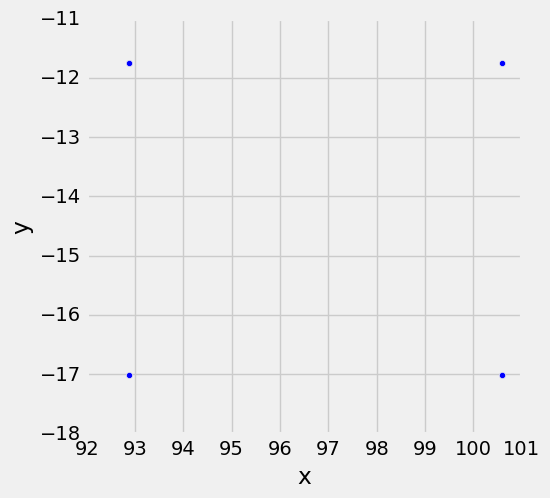

In [23]:
df.plot.scatter(x='x',y='y',figsize=(5,5))

In [24]:
# Convert list of Entrances/Exit to PANDAS Dataframe

df_list = []

# Iterate over the exit_entry_list to get 'names' and 'triangles' points
# Turn into dictionary and append to df_list for creation of dataframe

for i in exit_entry_list:
    xyz_list = []
    coordinates = i['collision_geometry']['triangles']
    for j in range(0,len(coordinates),3):
        xyz_list.append((coordinates[j],coordinates[j+1],coordinates[j+2]))
    x = coordinates[::3]
    y = coordinates[1::3]
    z = coordinates[2::3]
    data = {'name' : i['name'],
           'x' : x,
           'y' : y,
           'z' : z,
            'triangles' : xyz_list, #list of triples
            'no_of_triangles' : len(xyz_list),  #no. of triangles used to represent each entrance/exit varies
           }
    
    df_list.append(data)

# Create the dataframe
df = pd.DataFrame(df_list)
df.head(10)

# Because the way we look for 'exit' , 'entrance' and 'exit' in our list exit_entry_list, some elements appear twice 
# (those that have 2 of those words at the same time in their name)

df = df.drop_duplicates(subset='name',keep='first')
df.count()

name               19
no_of_triangles    19
triangles          19
x                  19
y                  19
z                  19
dtype: int64

In [25]:
# Convert to CSV for usage in other files
df.to_csv('entrance_exit_points.csv',index=False)

In [26]:
df

,name,no_of_triangles,triangles,x,y,z
0,entry__exit_4_58,6,"[(100.6, -17.01, 6.0), (100.6, -11.75, 6.0), (...","[100.6, 100.6, 92.88, 100.6, 92.88, 92.88]","[-17.01, -11.75, -11.75, -17.01, -11.75, -17.01]","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0]"
2,entry_exit_7_455,6,"[(120.12, 60.33, 6.0), (122.93, 64.5, 6.0), (1...","[120.12, 122.93, 120.16, 120.12, 123.0, 122.93]","[60.33, 64.5, 64.5, 60.33, 60.28, 64.5]","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0]"
4,entry_exit_stairs_544,6,"[(46.24, 9.3, 6.0), (53.04, 9.3, 6.0), (53.04,...","[46.24, 53.04, 53.04, 46.24, 53.04, 46.08]","[9.3, 9.3, 17.1, 9.3, 17.1, 16.96]","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0]"
6,entry_exit_591,9,"[(107.77, 10.18, 6.0), (107.42, 16.32, 6.0), (...","[107.77, 107.42, 103.53, 103.54, 107.77, 107.7...","[10.18, 16.32, 16.7, 9.3, 8.9, 10.18, 9.3, 10....","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]"
8,exit_entry_1_1002,6,"[(32.3, -20.64, 6.0), (36.34, -11.79, 6.0), (3...","[32.3, 36.34, 32.3, 32.3, 36.36, 36.34]","[-20.64, -11.79, -11.75, -20.64, -20.75, -11.79]","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0]"
10,exit_entry_ramp_1004,6,"[(32.3, -20.64, 6.0), (30.31, -11.75, 6.0), (3...","[32.3, 30.31, 30.39, 32.3, 32.3, 30.31]","[-20.64, -11.75, -20.67, -20.64, -11.75, -11.75]","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0]"
12,escalator_and_entry_exit_1442,27,"[(89.34, -17.41, 6.0), (89.54, -11.75, 6.0), (...","[89.34, 89.54, 84.15, 89.34, 84.15, 84.15, 84....","[-17.41, -11.75, -14.7, -17.41, -14.7, -17.43,...","[6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, ..."
14,SB-subway_entry_8358,6,"[(133.0, 32.2, 3.0), (133.0, 41.03, 3.0), (127...","[133.0, 133.0, 127.8, 133.0, 127.8, 127.8]","[32.2, 41.03, 41.03, 32.2, 41.03, 32.2]","[3.0, 3.0, 3.0, 3.0, 3.0, 3.0]"
15,Subway_Entrance_10424,33,"[(133.0, -12.6, 3.0), (127.8, -21.1, 3.0), (12...","[133.0, 127.8, 127.8, 133.0, 127.78, 127.8, 13...","[-12.6, -21.1, -29.85, -12.6, -14.9, -21.1, -1...","[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ..."
16,Subway_Entrance_1_10458,27,"[(122.63, -48.75, 3.0), (118.48, -46.55, 3.0),...","[122.63, 118.48, 119.4, 125.51, 127.8, 127.8, ...","[-48.75, -46.55, -48.75, -43.0, -43.0, -33.89,...","[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ..."


In [27]:
k=0
for i in df.triangles:
    for j in i:
        print(j,k)
        k+=1
#(df.triangles.values)

(100.6, -17.01, 6.0) 0
(100.6, -11.75, 6.0) 1
(92.88, -11.75, 6.0) 2
(100.6, -17.01, 6.0) 3
(92.88, -11.75, 6.0) 4
(92.88, -17.01, 6.0) 5
(120.12, 60.33, 6.0) 6
(122.93, 64.5, 6.0) 7
(120.16, 64.5, 6.0) 8
(120.12, 60.33, 6.0) 9
(123.0, 60.28, 6.0) 10
(122.93, 64.5, 6.0) 11
(46.24, 9.3, 6.0) 12
(53.04, 9.3, 6.0) 13
(53.04, 17.1, 6.0) 14
(46.24, 9.3, 6.0) 15
(53.04, 17.1, 6.0) 16
(46.08, 16.96, 6.0) 17
(107.77, 10.18, 6.0) 18
(107.42, 16.32, 6.0) 19
(103.53, 16.7, 6.0) 20
(103.54, 9.3, 6.0) 21
(107.77, 8.9, 6.0) 22
(107.77, 10.18, 6.0) 23
(103.54, 9.3, 6.0) 24
(107.77, 10.18, 6.0) 25
(103.53, 16.7, 6.0) 26
(32.3, -20.64, 6.0) 27
(36.34, -11.79, 6.0) 28
(32.3, -11.75, 6.0) 29
(32.3, -20.64, 6.0) 30
(36.36, -20.75, 6.0) 31
(36.34, -11.79, 6.0) 32
(32.3, -20.64, 6.0) 33
(30.31, -11.75, 6.0) 34
(30.39, -20.67, 6.0) 35
(32.3, -20.64, 6.0) 36
(32.3, -11.75, 6.0) 37
(30.31, -11.75, 6.0) 38
(89.34, -17.41, 6.0) 39
(89.54, -11.75, 6.0) 40
(84.15, -14.7, 6.0) 41
(89.34, -17.41, 6.0) 42
(84.15, -14

In [304]:
#Z value for type polygon ranges upto 24 whereas Z value of entrance/exits goes only upto 6.
#Are there no entrances/exits in the floors above that??????

In [1]:
!jupyter nbconvert --to script Buildings_Exploratory.ipynb

[NbConvertApp] Converting notebook Buildings_Exploratory.ipynb to script
[NbConvertApp] Writing 6042 bytes to Buildings_Exploratory.py
